<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №3-4. Классическая модель Лотки-Вольтерры и ее модификации.**
###Компьютерное  моделирование  динамики  численностей  биологических популяций в классической и модифицированной модели «хищник-жертва».

Классическая система «хищник-жертва» имеет следующий вид:          

$
\left\{
\begin{array}{cc}
\cfrac{dN_1}{dt} = (ε_1 - γ_1 · N_2)· N_1, (1) \\
\cfrac{dN_2}{dt} = (-ε_2 + γ_2 · N_1)· N_2, (2) \\
\end{array}
\right.
$

где:
> * $N_1, N_2 \ -$ численности популяций жертв и хищников, соответственно;
> * Жертвы в отсутствие хищников размножаются с постоянным относительным приростом $ε_1$;
> * Их потери, вследствие поедания хищниками, пропорциональны произведению числа жертв и хищников c коэффициентом $γ_1$;
> * Прирост популяции хищников зависит от количества пищи (жертв) 
и пропорционален произведению численностей жертв и хищников, с 
коэффициентом $γ_2$;
> * Хищники умирают естественной смертью, смертность 
определяется константой $ε_2$. 

$(1) \ -$ относительный прирост жертв в единицу времени убывает линейно с ростом численности популяции хищников;

$(2) \ -$ относительный прирост популяции хищников возрастает линейно с ростом популяции жертв.

Параметры модели:

$ε_1, ε_2, γ_1, γ_2 > 0$

In [ ]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

In [ ]:
# Отрисовка графика численного решения компонент системы «хищник-жертва»
def plot_solution(y1, y2, time, color1 = "b", color2 = "orange"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "N1")
    plt.plot(time, y2, c = color2, label = "N2")
    plt.xlabel("time")          
    plt.ylabel("N1, N2")
    plt.title(f"Численное решение системы «хищник-жертва»")
    plt.legend()
    plt.grid(True)              
    plt.show()

# Отрисовка графика фазового портрета системы «хищник-жертва»
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("N1")
    plt.ylabel("N2")
    plt.title(f"Фазовый портрет системы «хищник-жертва»")
    plt.grid(True)
    plt.show()

В задании необходимо проанализировать 3 вариации модели Лотки-Вальтера.
Параметры, согласно номеру варианта (1):    
$
ε_1 = 4\\ 
γ_1 = 3\\ 
ε_2 = 2\\ 
γ_2 = 1 \\ 
α = 0.1 $

In [ ]:
# Классическая модель Лотки-Вольтерры
def model_classic(y, t, eps_1=4, gamma_1=3, eps_2=2, gamma_2=1, alpha = 0.1, err = 0): # система Лотки-Вольтерры, классика
    y1, y2 = y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 - err
    return [dy1, dy2]

Модель Лотки-Вольтерры с логистической поправкой α, моделирующей взаимодействие популяций в условиях регулярного изъятия или пополнения популяций, когда оба вида представляют промысловую ценность:

$
\left\{
\begin{array}{cc}
\cfrac{dN_1}{dt} = (ε_1 - γ_1 · N_2)· N_1 - αN_1^2 \\
\cfrac{dN_2}{dt} = (-ε_2 - γ_2 · N_1)· N_2 - αN_2^2 \\
\end{array}
\right.
$

In [ ]:
# Модель Лотки-Вольтерры с логистической поправкой
def model_logistic(y, t, eps_1=4, gamma_1=3, eps_2=2, gamma_2=1, alpha = 0.1, err = 0):
    y1, y2 = y 
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + alpha * y1 ** 2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 + alpha * y2 ** 2 - err
    return [dy1, dy2]

In [ ]:
# Функция проведения анализа системы с конечными параметрами eps1, eps2 и gamma1, gamma2
def analyze(f, nulls, starts, alpha = 0.1, err = 0, time_end = 20):
    time = np.linspace(0, time_end, 5000)
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, (4, 3, 2, 1, alpha, err))
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

ункции $N_1(t)$ и $N_2(t)$, определяющие численности жертв и хищников, имеют колебательный характер, причем максимум $N_1(t)$ сдвинут
по фазе относительно $N_2(t)$. Для заданного начального соотношения 
численностей сначала имеет место рост обеих популяций. Когда число 
хищников достигает величины $γ1=2,5$, популяция жертв не успевает 
восстанавливаться и число жертв начинает убывать. Уменьшение количества пищи через некоторое время сказывается на популяции хищников, и когда число жертв достигает величины $\frac{ε_2}{γ_2}=2$ (в этой точке 
производная $N_1(t) = 0$), число хищников тоже начинает сокращаться. Сокращение происходит до тех пор, пока численность хищников не достигнет уровня $\frac{ε_1}{γ_1}=1,6$ (здесь $N_2(t) = 0$). С этого момента начинает расти популяция жертв, в результате через некоторое время пищи становится достаточно, чтобы обеспечить прирост хищников; обе популяции растут и процесс повторяется снова. В целом, наблюдаются колебания возле состояния равновесия $(2, 1.6)$. 

В точке [1, 1]


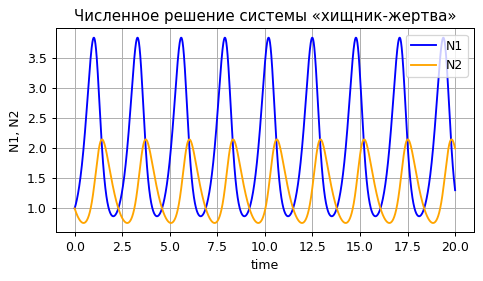

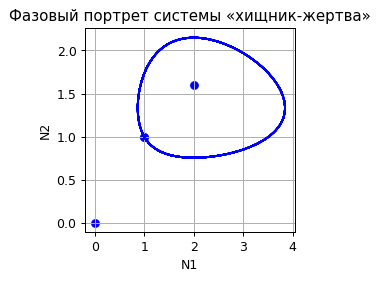

В точке [5, 2]


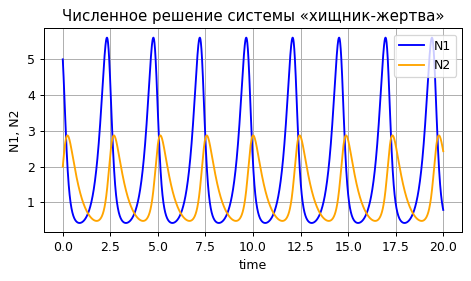

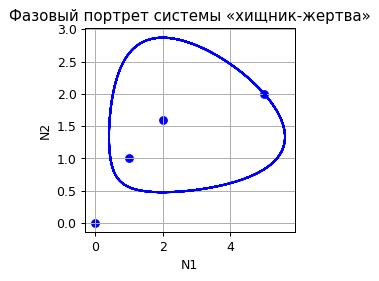

In [ ]:
# Задание начальных и особых точек
initial_points = [
    [1, 1],
    [5, 2]
]

special_points = [
    [0, 0],
    [1, 1],
    [2, 1.6]
]

analyze(model_classic, special_points, initial_points)

В точке [1, 1]


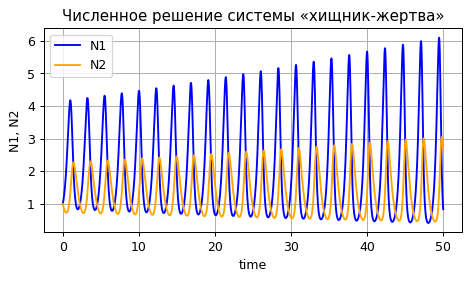

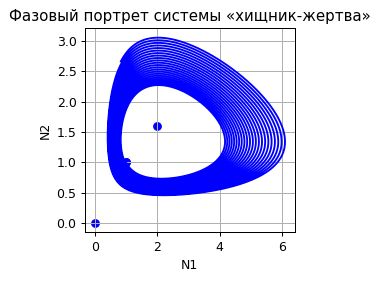

В точке [2, 2]


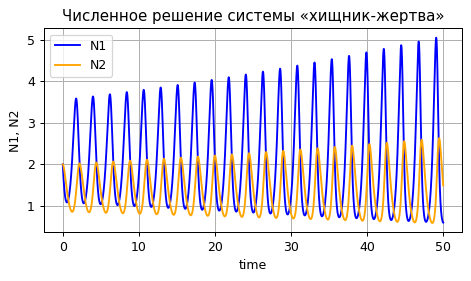

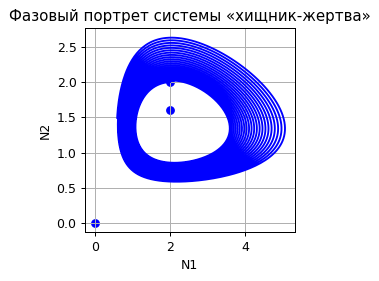

In [ ]:
initial_points = [
    [1, 1],
    [2, 2],
]

special_points = [
    [0, 0],
    [1, 1],
    [2, 1.6]
]

analyze(model_classic, special_points, initial_points, err = 0.1, time_end = 50)

**Вывод:**

Классическая модель структурно не устойчива, при малейших отклонениях точка центра переходит в предельный цикл.

Изменение знака параметра $α$ содержательно можно интерпретировать как дополнительное искусственное пополнение популяций. В результате положение равновесия превращается в неустойчивый фокус, а сами колебания становятся расходящимися. 

Устойчивость фокуса определяет знак коэффициента 
$α$: положительным значениям соответствует асимптотически устойчивый 
по Ляпунову фокус и затухающие колебания численностей обоих видов, 
отрицательным – неустойчивый фокус и расходящиеся колебания. 

В точке [1, 1]


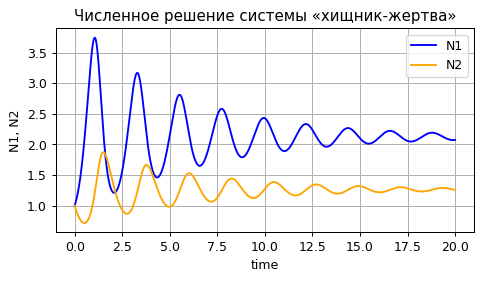

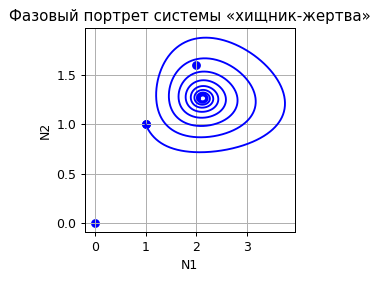

В точке [3, 3]


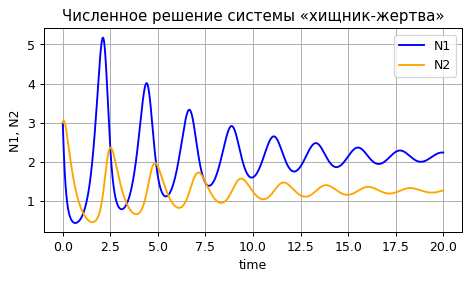

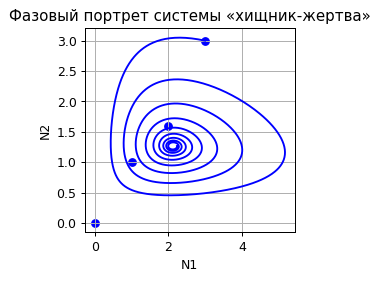

In [ ]:
initial_points = [
    [1, 1],
    [3, 3]
]

special_points = [
    [0, 0],
    [1, 1],
    [2, 1.6]
]

analyze(model_logistic, special_points, initial_points, alpha = -0.1)

В точке [1, 1]


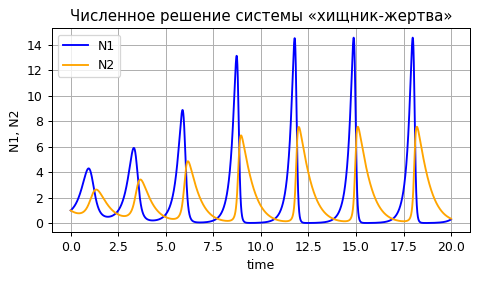

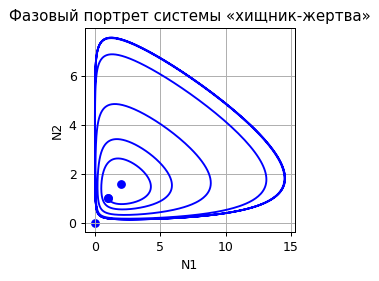

В точке [3, 3]


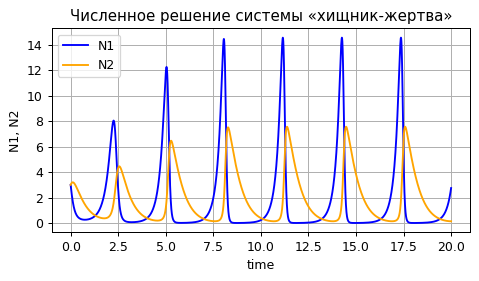

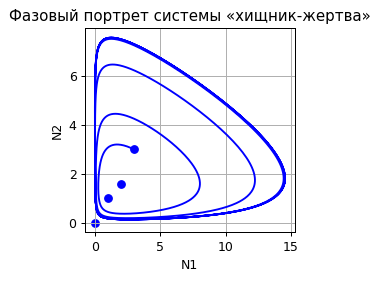

In [ ]:
initial_points = [
    [1, 1],
    [3, 3]
]

special_points = [
    [0, 0],
    [1, 1],
    [2, 1.6]
]

analyze(model_logistic, special_points, initial_points, alpha = 0.1, err = 0.1)

**Вывод:**

Модель с логистической поправкой структурно устойчива, тип точки равновесия - неустойчивый фокус.
Особая точка типа центр, будучи устойчивой к малым изменениям начальных условий, оказывается структурно не устойчивой (не грубой): при незначительных изменениях дифференциальной 
системы центр легко разрушается и трансформируется в фокус. 